In [2]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

Declarando as variáveis

In [3]:
missing_people_file = 'missing_people.json'
base_url = 'https://devs.pc.sc.gov.br/servicos/desaparecidos/dados?pagina=0&size=1000'

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
           'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
           'Referrer Policy':'strict-origin-when-cross-origin',
           }
page = 0

people_count = 0
male_gender_count = 0
female_gender_count = 0
ages_of_missing = []
city_list = {}
first_names = {}

# Funções que serão usadas

In [4]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i]-4,y[i],x[i], color='#ffffff')

def show_graph(values, labels, title=''):
  # create dataset
  y_pos = np.arange(len(labels))

  # Create horizontal bars
  plt.barh(y_pos, values)
  addlabels(values, y_pos)

  # Create names on the x-axis
  plt.yticks(y_pos, labels)

  plt.title(title)
  # Show graphic
  plt.show()

def get_top_10(data_dict):
  data_dict_ordered = sorted(data_dict.items(), key=lambda x:x[1], reverse=True)[:10]

  limit = 10
  values = []
  labels = []

  for city, count in data_dict_ordered:
      values.append(count)
      labels.append(city)
      limit -= 1
      if limit == 0:
          break

  return values, labels

Buscando os dados no site de Desaparecidos

In [5]:
r = requests.get(base_url)

data = json.loads(r.text)

Preenchendo as informações em um dicionário interno

In [6]:
for person in data:
    people_count += 1
    if person["sexo"] == "Feminino":
        female_gender_count += 1
    else:
        male_gender_count += 1

    age = person["idadeDesaparecimento"]
    if age:
        ages_of_missing.append(int(age))


    city = person["municipio"]
    if city:
        if city in city_list:
            city_list[city] += 1
        else:
            city_list[city] = 1

    first_name = person["nomePessoa"].split()[0]
    if first_name in first_names:
        first_names[first_name] += 1
    else:
        first_names[first_name] = 1

Total de Registros de Desaparecimentos

In [7]:
print('Registros de Desaparecimento: {}'.format(people_count))

Registros de Desaparecimento: 808


# 10 Cidades com maior Número de Desaparecimentos'

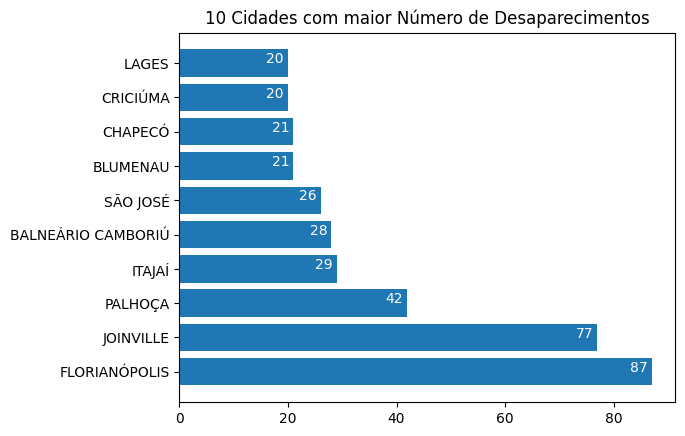

In [8]:
values, labels = get_top_10(city_list)

show_graph(values, labels,'10 Cidades com maior Número de Desaparecimentos')

# Desaparecimento quanto ao Sexo

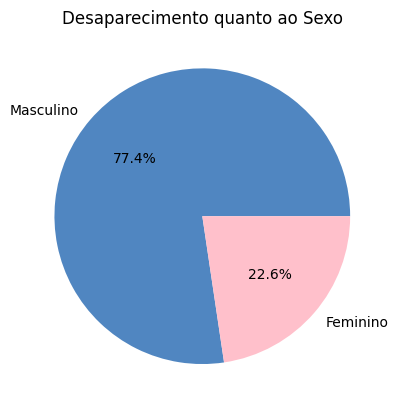

In [9]:
male = male_gender_count/people_count
female = female_gender_count/people_count


labels = ['Masculino', 'Feminino']
sizes = [male, female]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#5086c1', 'pink'])
plt.title('Desaparecimento quanto ao Sexo')
plt.show()

# Menor e maior idade de pessoa desaparecida

In [10]:
age_groups = {}
for age in ages_of_missing:
    if age in age_groups:
        age_groups[age] += 1
    else:
        age_groups[age] = 1

print('Maior idade: {}'.format(min(ages_of_missing)))
print('Maior idade: {}'.format(max(ages_of_missing)))

Maior idade: 1
Maior idade: 84


# 10 idades com mais registros de desaparecimento



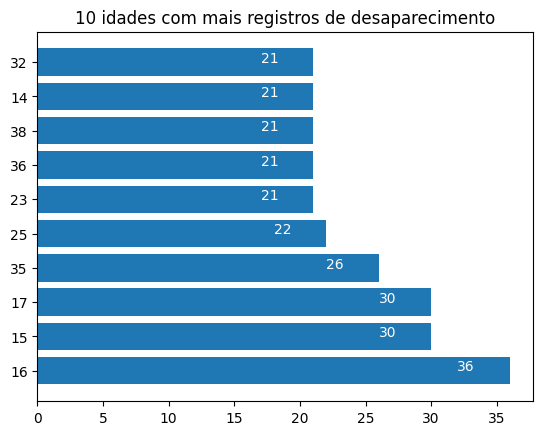

In [11]:
values, labels = get_top_10(age_groups)

show_graph(values, labels,'10 idades com mais registros de desaparecimento')

In [17]:
for i in range(0, len(labels)):
  print('idade {}, quantidade: {}'.format(labels[i], values[i]))

idade 16, quantidade: 36
idade 15, quantidade: 30
idade 17, quantidade: 30
idade 35, quantidade: 26
idade 25, quantidade: 22
idade 23, quantidade: 21
idade 36, quantidade: 21
idade 38, quantidade: 21
idade 14, quantidade: 21
idade 32, quantidade: 21


# Desaparecimentos por Idade

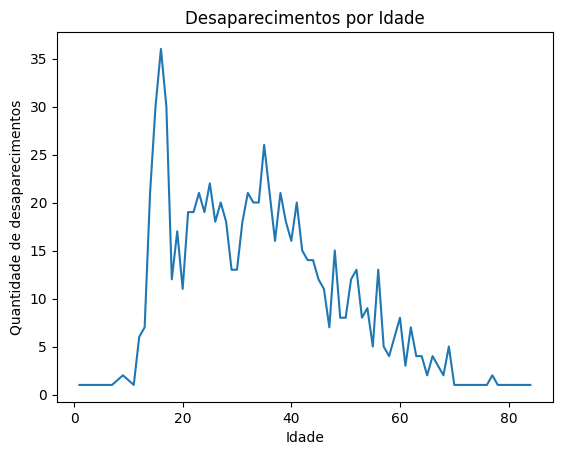

In [13]:
ages = sorted(age_groups.items())
x, y = zip(*ages)

plt.title('Desaparecimentos por Idade')
plt.ylabel('Quantidade de desaparecimentos')
plt.xlabel('Idade')
plt.plot(x, y)
plt.show()

# Idade Média dos Desaparecidos

In [14]:
age_average = sum(ages_of_missing) / len(ages_of_missing)
print('Idade Média: {:.2f}'.format(age_average))

Idade Média: 34.04


# 10 Nomes mais Populares

In [15]:
# Encontrando o nome mais popular
print('10 Nomes mais Populares')
name_list_ordered = sorted(first_names.items(), key=lambda x:x[1], reverse=True)

limit = 10
for name, count in name_list_ordered:
    print('{}: {}'.format(name, count))
    limit -= 1
    if limit == 0:
        break

10 Nomes mais Populares
JOÃO: 11
JOSE: 9
BRUNO: 8
MARCOS: 8
ANA: 8
MARIA: 8
GABRIEL: 8
CARLOS: 7
LUCAS: 7
MATHEUS: 7


Nuvem de Palavras dos Nomes mais comuns entre os desaparecidos

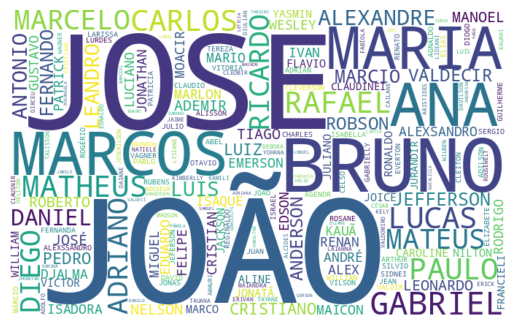

In [16]:
wc = WordCloud(width = 680, height = 420, background_color = "white")
wc.generate_from_frequencies(first_names)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")